In [1]:
# import essential libraries
import pandas as pd
import numpy as np

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# to read stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# for time stamps
from datetime import datetime


In [2]:
pd.__version__

'1.3.5'

In [3]:
# Stocks we'll be using for Analysis
stockSymbol = ['TCS.NS','INFY.NS','HCLTECH.NS','WIPRO.NS']
stockList = ['TCS','INFOSYS','HCLTECH','WIPRO']

# Define start and end date of Historical data
endDate = datetime.now()
startDate = datetime(endDate.year - 1, endDate.month, endDate.day)

# Fecthing the data 
for stock,symbol in zip(stockList,stockSymbol):
    globals()[stock] = yf.download(symbol,startDate,endDate)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
for stock,symbol in zip(stockList,stockSymbol):
    globals()[stock] = yf.download(symbol,startDate,endDate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
#Make a seperate dataframe for each of the stocks in the list
companyList = [TCS,INFOSYS,HCLTECH,WIPRO]
companyName = ["TCS","INFOSYS",'HCLTECH','WIPRO']

for company, name in zip(companyList,companyName):
    company["Company"] = name

df = pd.concat(companyList, axis=0)

<bound method NDFrame.describe of                    Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-06-14  3279.000000  3308.699951  3270.350098  3276.350098  3235.437256   
2021-06-15  3298.000000  3298.000000  3251.550049  3262.750000  3222.006836   
2021-06-16  3262.100098  3294.699951  3253.000000  3274.350098  3233.461914   
2021-06-17  3265.500000  3336.050049  3260.000000  3317.750000  3276.319824   
2021-06-18  3350.899902  3358.000000  3275.000000  3297.300049  3256.125244   
...                 ...          ...          ...          ...          ...   
2022-06-07   470.000000   470.750000   465.149994   467.649994   467.649994   
2022-06-08   471.049988   472.000000   464.299988   470.399994   470.399994   
2022-06-09   467.049988   476.149994   464.250000   475.049988   475.049988   
2022-06-10   467.200012   467.200012   456.299988   460.950012   460.950012   
2022-06-13   450.0

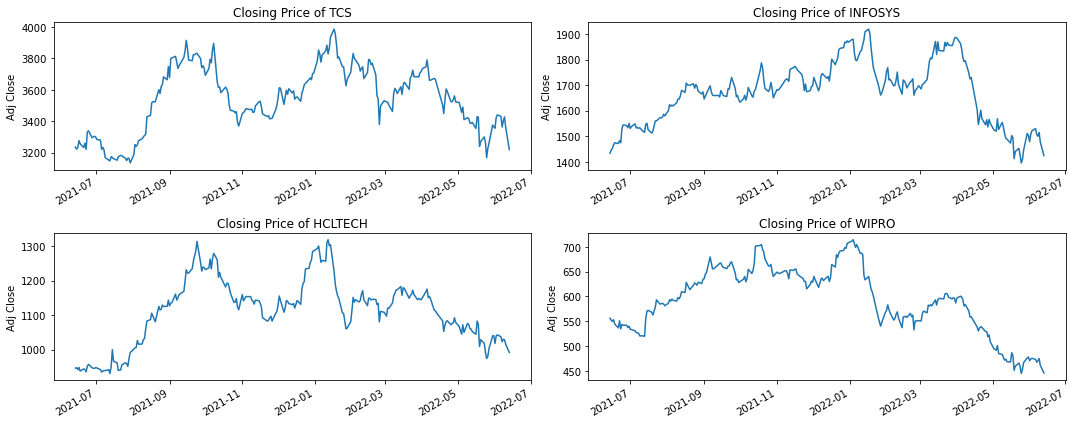

In [6]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(companyList, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stockList[i - 1]}")
    
plt.tight_layout()

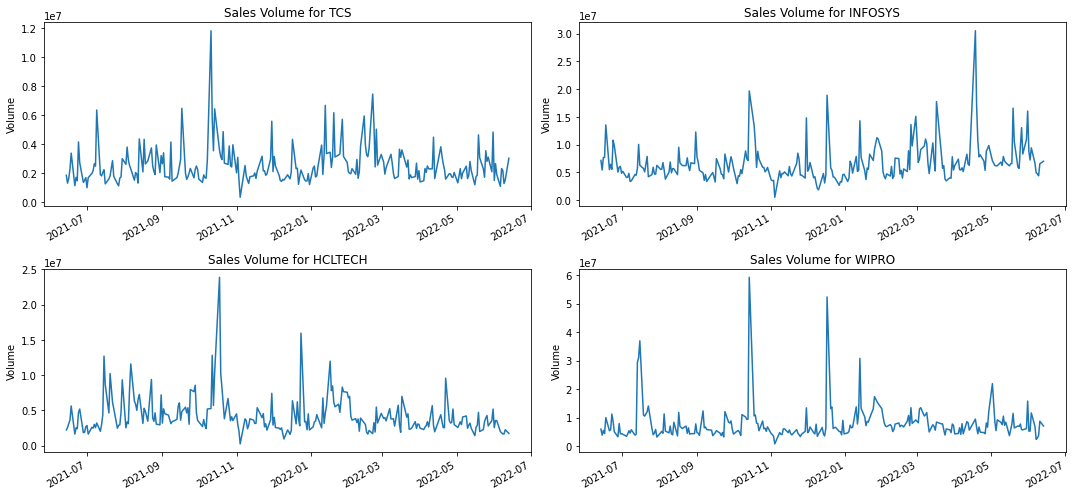

In [7]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(companyList, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stockList[i - 1]}")
    
plt.tight_layout()

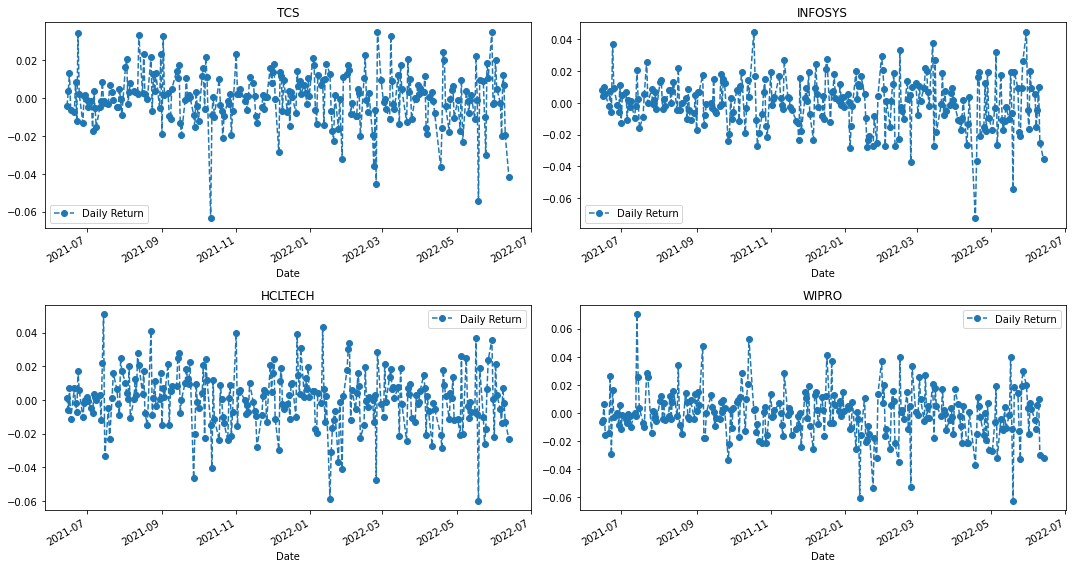

In [8]:
# We'll use pct_change to find the percent change for each day
for company in companyList:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TCS['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('TCS')

INFOSYS['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('INFOSYS')

HCLTECH['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('HCLTECH')

WIPRO['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('WIPRO')

fig.tight_layout()

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in companyList:
        column_name = f"{ma}MA"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

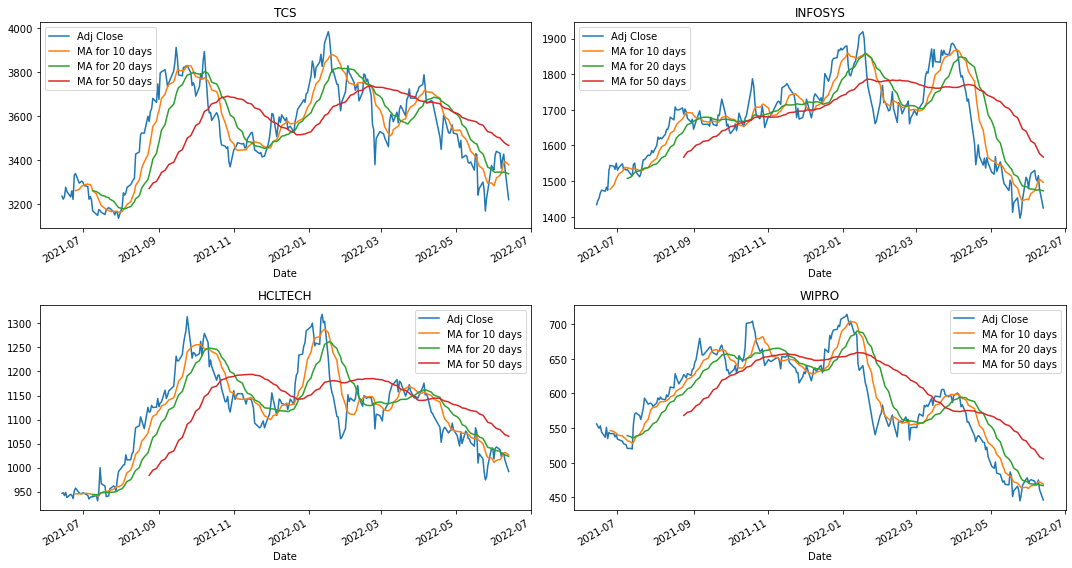

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

TCS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('TCS')

INFOSYS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('INFOSYS')

HCLTECH[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('HCLTECH')

WIPRO[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('WIPRO')

fig.tight_layout()

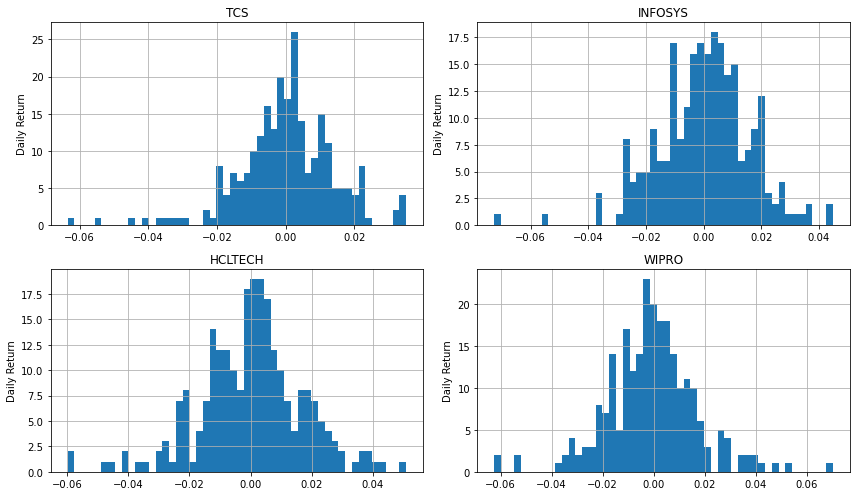

In [11]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(companyList, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{stockList[i - 1]}')
    
plt.tight_layout()

In [12]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(stockSymbol, 'yahoo', startDate, endDate)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,TCS.NS,INFY.NS,HCLTECH.NS,WIPRO.NS
Date,,,,
2021-06-14,3235.437012,1433.774536,946.460449,556.057922
2021-06-15,3222.006592,1445.642578,947.662537,552.394531
2021-06-16,3233.461914,1452.214111,941.844604,549.770630
2021-06-17,3276.319824,1466.632324,948.576111,553.186584
2021-06-18,3256.125244,1474.478882,937.853638,544.374390


In [13]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,TCS.NS,INFY.NS,HCLTECH.NS,WIPRO.NS
Date,,,,
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,-0.004151,0.008277,0.001270,-0.006588
2021-06-16,0.003555,0.004546,-0.006139,-0.004750
2021-06-17,0.013254,0.009928,0.007147,0.006213
2021-06-18,-0.006164,0.005350,-0.011304,-0.015930


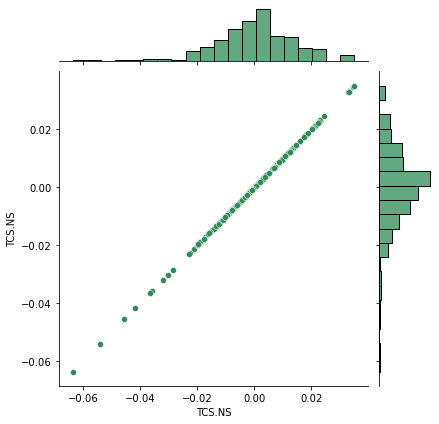

In [14]:
# Comparing RELIANCE to itself should show a perfectly linear relationship
sns.jointplot(x='TCS.NS', y='TCS.NS', data=tech_rets, kind='scatter', color='seagreen')

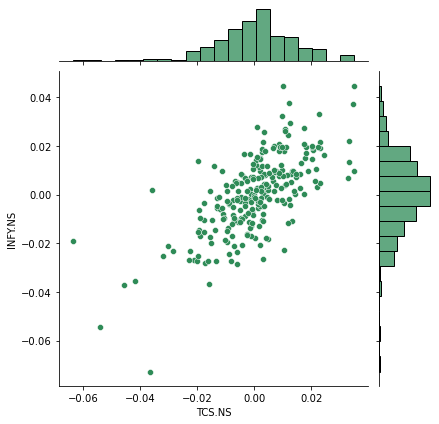

In [15]:
# Comparing RELIANCE to itself should show a perfectly linear relationship
sns.jointplot(x='TCS.NS', y='INFY.NS', data=tech_rets, kind='scatter', color='seagreen')

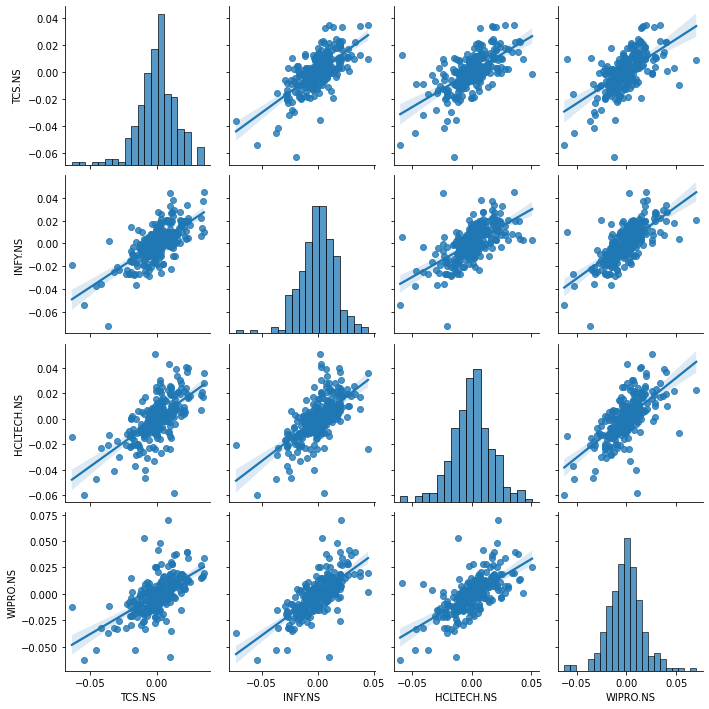

In [16]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

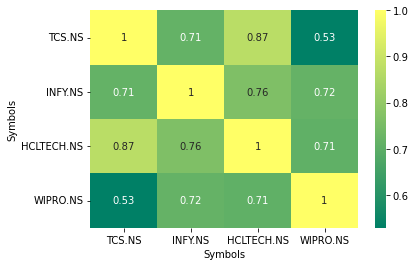

In [17]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

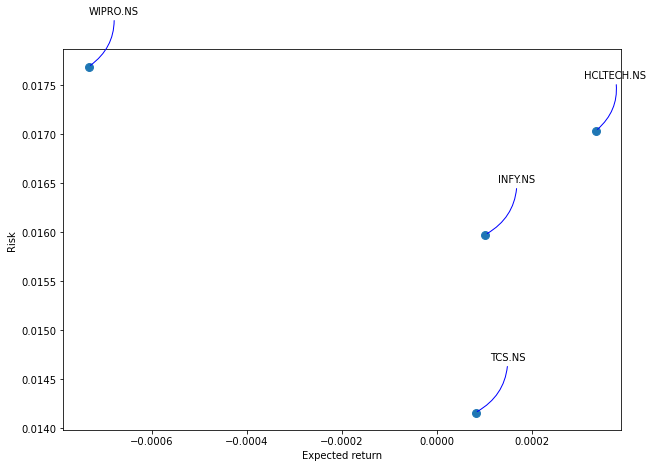

In [18]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [19]:
# Get the stock quote
df = DataReader('TCS.NS', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,592.974976,576.500000,580.500000,589.299988,2248542.0,482.006134
2012-01-03,604.950012,590.000000,591.625000,598.799988,2708884.0,489.776550
2012-01-04,602.500000,584.650024,602.450012,586.500000,2386770.0,479.715912
2012-01-05,592.500000,583.674988,586.400024,586.000000,2547312.0,479.307007
2012-01-06,594.174988,578.400024,583.000000,584.700012,2119728.0,478.243896


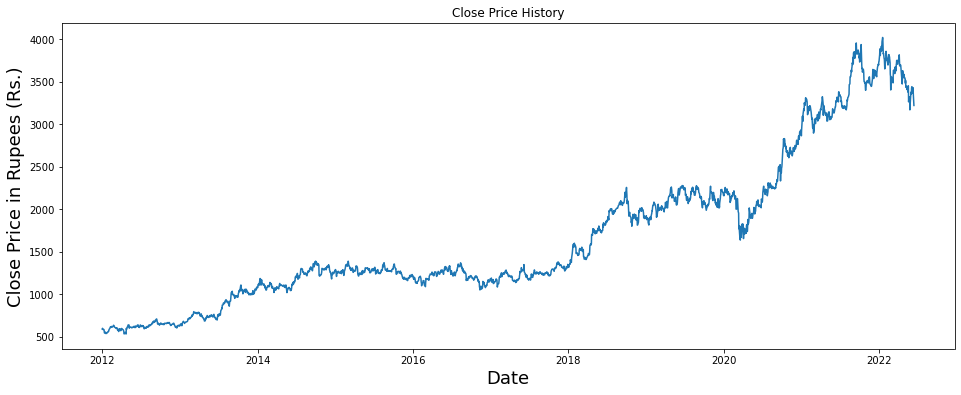

In [20]:
#Plot TCS Price Chart
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in Rupees (Rs.)', fontsize=18)
plt.show()

In [21]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2447

In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0163965 ],
       [0.01912088],
       [0.01559352],
       ...,
       [0.83021349],
       [0.81094199],
       [0.77070717]])

In [23]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0163965 , 0.01912088, 0.01559352, 0.01545013, 0.01507733,
       0.01535693, 0.01450377, 0.01043153, 0.00362056, 0.00308286,
       0.006474  , 0.00569252, 0.00170633, 0.0016203 , 0.00218668,
       0.00192857, 0.00350585, 0.00483937, 0.0063808 , 0.00681096,
       0.00977194, 0.0092414 , 0.0120088 , 0.01538562, 0.01858317,
       0.01917824, 0.02228261, 0.02356593, 0.0242542 , 0.0231501 ,
       0.02233279, 0.02542998, 0.02309992, 0.02358744, 0.02477758,
       0.02697141, 0.02803967, 0.02950223, 0.02692841, 0.02327199,
       0.02261239, 0.02227543, 0.02193847, 0.02051176, 0.01975179,
       0.01843978, 0.020691  , 0.01789492, 0.01903485, 0.01294801,
       0.01426   , 0.01509884, 0.0082807 , 0.01012324, 0.01598784,
       0.01484073, 0.017264  , 0.01395889, 0.01584445, 0.01446075])]
[0.011033754178261579]

[array([0.0163965 , 0.01912088, 0.01559352, 0.01545013, 0.01507733,
       0.01535693, 0.01450377, 0.01043153, 0.00362056, 0.00308286,
       0.006474  , 0.00569252, 0.0

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2387/2387 [==============================] - 71s 29ms/step - loss: 0.0011


In [25]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

82.10035964142708

C:\Users\killua\AppData\Local\Temp\ipykernel_3388\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


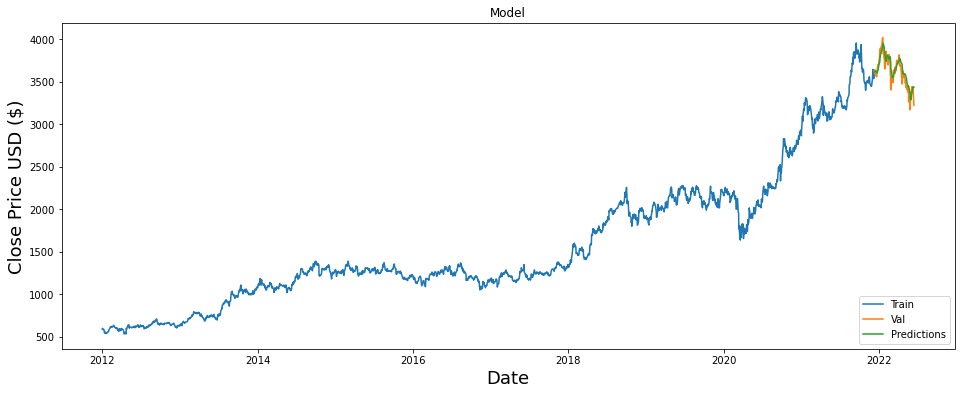

In [26]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [27]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-12-08,3626.899902,3607.312256
2021-12-09,3601.750000,3615.975098
2021-12-10,3636.800049,3620.148193
2021-12-13,3609.649902,3626.718262
2021-12-14,3623.800049,3629.381104
...,...,...
2022-06-07,3362.699951,3427.552734
2022-06-08,3404.149902,3434.444092
2022-06-09,3427.100098,3436.968750


In [28]:
train.to_csv("Data/train.csv")
valid.to_csv("Data/prediction.csv")